In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
import nltk
import wordcloud
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter


In [2]:
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import emoji
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

In [4]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\AI ASSIGMNET\\New folder\\Product review\\dataset.txt', sep="\t", header=None)
df['label'] = df[0].str.split(' ').str[0]
df['review'] = df[0].str.split(' ').str[1:]
df['review'] = df['review'].apply(lambda x: ' '.join(x))
df.drop(columns=[0], inplace=True)
print(df.head(10))



        label                                             review
0  __label__2  Great CD: My lovely Pat has one of the GREAT v...
1  __label__2  One of the best game music soundtracks - for a...
2  __label__1  Batteries died within a year ...: I bought thi...
3  __label__2  works fine, but Maha Energy is better: Check o...
4  __label__2  Great for the non-audiophile: Reviewed quite a...
5  __label__1  DVD Player crapped out after one year: I also ...
6  __label__1  Incorrect Disc: I love the style of this, but ...
7  __label__1  DVD menu select problems: I cannot scroll thro...
8  __label__2  Unique Weird Orientalia from the 1930's: Exoti...
9  __label__1  Not an "ultimate guide": Firstly,I enjoyed the...


In [5]:
df['sentiment'] = df['label'].replace({'__label__1': 'negative', '__label__2': 'positive'})
df.head(10)

,label,review,sentiment
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,positive
1,__label__2,One of the best game music soundtracks - for a...,positive
2,__label__1,Batteries died within a year ...: I bought thi...,negative
3,__label__2,"works fine, but Maha Energy is better: Check o...",positive
4,__label__2,Great for the non-audiophile: Reviewed quite a...,positive
5,__label__1,DVD Player crapped out after one year: I also ...,negative
6,__label__1,"Incorrect Disc: I love the style of this, but ...",negative
7,__label__1,DVD menu select problems: I cannot scroll thro...,negative
8,__label__2,Unique Weird Orientalia from the 1930's: Exoti...,positive
9,__label__1,"Not an ""ultimate guide"": Firstly,I enjoyed the...",negative


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   label      400000 non-null  object
 1   review     400000 non-null  object
 2   sentiment  400000 non-null  object
dtypes: object(3)
memory usage: 9.2+ MB


In [7]:
print(df['sentiment'].value_counts())

positive    200000
negative    200000
Name: sentiment, dtype: int64


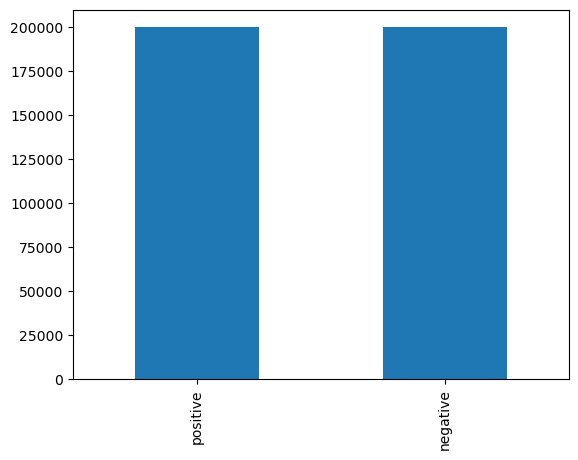

In [8]:
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

count    400000.000000
mean        431.429630
std         237.435383
min          99.000000
25%         231.000000
50%         383.000000
75%         595.000000
max        1015.000000
Name: length, dtype: float64


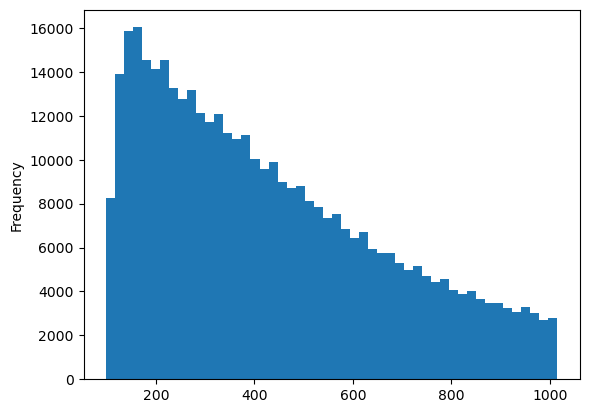

In [9]:
df['length'] = df['review'].apply(len)
print(df['length'].describe())
df['length'].plot(kind='hist', bins=50)
plt.show()

count    400000.000000
mean         78.424145
std          42.798609
min           6.000000
25%          42.000000
50%          70.000000
75%         108.000000
max         230.000000
Name: word_count, dtype: float64


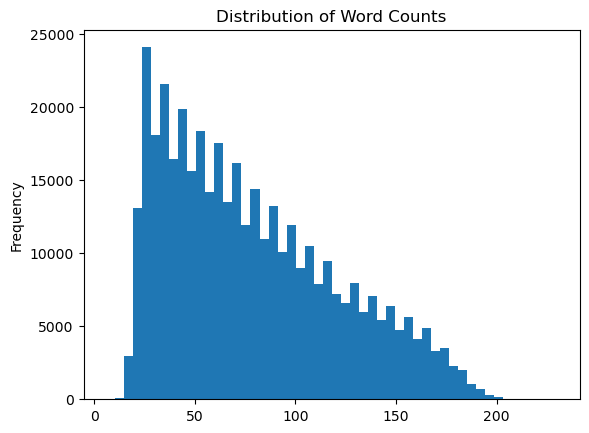

In [10]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())
df['word_count'].plot(kind='hist', bins=50)
plt.title('Distribution of Word Counts')
plt.show()

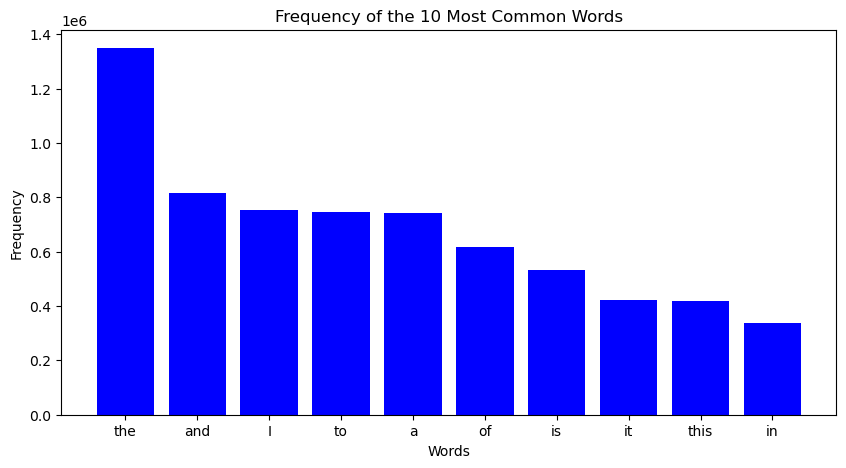

In [11]:
all_words = [word for tweet in df['review'] for word in tweet.split()]
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the 10 Most Common Words')
plt.show()

# Preprocessing

## Cleaning the data

In [12]:
def clean_text(text):

    text = str(text).lower()
    
    # Remove Twitter handles
    text = re.sub('@\w+', '', text)
    
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove new line characters
    text = re.sub('\n', '', text)
    
    # Remove words that contain numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    return text

In [13]:
print("Data before preprocessing")
df['review'].head(5)

Data before preprocessing


0    Great CD: My lovely Pat has one of the GREAT v...
1    One of the best game music soundtracks - for a...
2    Batteries died within a year ...: I bought thi...
3    works fine, but Maha Energy is better: Check o...
4    Great for the non-audiophile: Reviewed quite a...
Name: review, dtype: object

In [14]:
df['cleaned_text'] = df['review'].apply(clean_text)
print("Data after preprocessing")
print(df['cleaned_text'].head(5))

Data after preprocessing
0    great cd my lovely pat has one of the great vo...
1    one of the best game music soundtracks  for a ...
2    batteries died within a year  i bought this ch...
3    works fine but maha energy is better check out...
4    great for the nonaudiophile reviewed quite a b...
Name: cleaned_text, dtype: object


## Tokenization

In [15]:
df['tokenized_text']=df['cleaned_text'].apply(word_tokenize)
print("Data after tokenization")
df['tokenized_text'].head(5)

Data after tokenization


0    [great, cd, my, lovely, pat, has, one, of, the...
1    [one, of, the, best, game, music, soundtracks,...
2    [batteries, died, within, a, year, i, bought, ...
3    [works, fine, but, maha, energy, is, better, c...
4    [great, for, the, nonaudiophile, reviewed, qui...
Name: tokenized_text, dtype: object

## Removing Stop Words

In [16]:
stop_words = set(stopwords.words('english'))
print("The stop words are\n",stop_words)

The stop words are
 {'did', 'before', 'than', 'further', 'is', 'were', 'those', 'both', 'doing', 'we', 'are', "shouldn't", 'been', 'off', 'our', 'if', 'didn', 'or', 'through', 'm', 'while', 'o', 'once', 'needn', 'about', 'myself', 'over', 'ourselves', 'more', 'isn', 'shouldn', "weren't", 'be', 'for', 'am', 'their', "mightn't", "hasn't", 'because', 'again', 'an', 'but', "she's", 'ma', "won't", 'as', 'all', "hadn't", 'himself', 'was', 'ain', 'she', 'and', 'not', 'should', 'hasn', 'your', 'very', 'themselves', 'to', 'had', 'such', "you'd", "haven't", "should've", 'being', 'then', 'can', 've', 'how', 'you', 'above', 'doesn', "wasn't", "you'll", 'it', 'on', 'where', 'him', 'my', "mustn't", 'yourself', 'most', 'below', 'the', 'same', 'which', "you're", 'after', 'in', 'other', "didn't", 'yourselves', 'hers', 'its', 'do', 'no', 'from', 'only', "shan't", 'who', 'ours', 'aren', 'between', 'them', 'a', 'i', 'few', 'mustn', 'they', 'what', 'any', "that'll", 'won', 'up', 'too', 'having', 'out', "yo

In [17]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
print("Data after removing stopwords:")
print(df['tokenized_text'].head(5))

Data after removing stopwords:
0    [great, cd, lovely, pat, one, great, voices, g...
1    [one, best, game, music, soundtracks, game, di...
2    [batteries, died, within, year, bought, charge...
3    [works, fine, maha, energy, better, check, mah...
4    [great, nonaudiophile, reviewed, quite, bit, c...
Name: tokenized_text, dtype: object


## POS Tagging

In [18]:
df['pos_tagged_text'] = df['tokenized_text'].apply(lambda x: nltk.pos_tag(x))
print("Data after POS tagging")
print(df['pos_tagged_text'].head(5))

Data after POS tagging
0    [(great, JJ), (cd, NN), (lovely, RB), (pat, JJ...
1    [(one, CD), (best, JJS), (game, NN), (music, N...
2    [(batteries, NNS), (died, VBD), (within, IN), ...
3    [(works, NNS), (fine, VBP), (maha, NN), (energ...
4    [(great, JJ), (nonaudiophile, JJ), (reviewed, ...
Name: pos_tagged_text, dtype: object


## Lemmatization

In [19]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_text'] = df['pos_tagged_text'].apply(lambda x: [lemmatizer.lemmatize(word[0]) for word in x])

print("Data after lemmatization:")

df['lemmatized_text'].head(5)

Data after lemmatization:


0    [great, cd, lovely, pat, one, great, voice, ge...
1    [one, best, game, music, soundtrack, game, did...
2    [battery, died, within, year, bought, charger,...
3    [work, fine, maha, energy, better, check, maha...
4    [great, nonaudiophile, reviewed, quite, bit, c...
Name: lemmatized_text, dtype: object

In [20]:
df=df.dropna()

## Splitting of Data into Train and Test Set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.apply(' '.join))
X_test = vectorizer.transform(X_test.apply(' '.join))
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 320000
Test set size: 80000


## Training Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89     39896
    positive       0.89      0.90      0.89     40104

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000



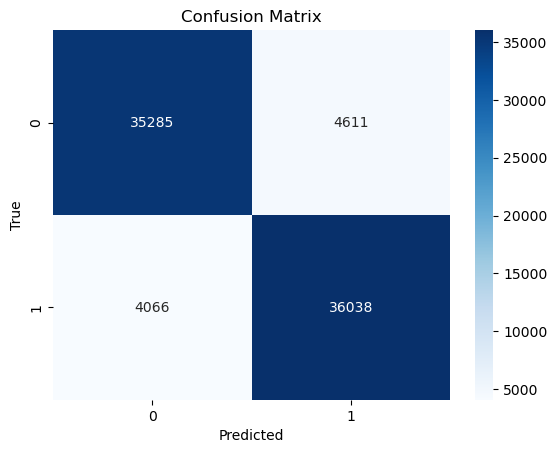

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f2_score = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score)

Accuracy: 0.8915375
Precision: 0.8916063611098787
Recall: 0.8915375
F2 Score: 0.8915247873433607


## Training Naive Bias Model


              precision    recall  f1-score   support

    negative       0.83      0.86      0.84     39896
    positive       0.86      0.82      0.84     40104

    accuracy                           0.84     80000
   macro avg       0.84      0.84      0.84     80000
weighted avg       0.84      0.84      0.84     80000



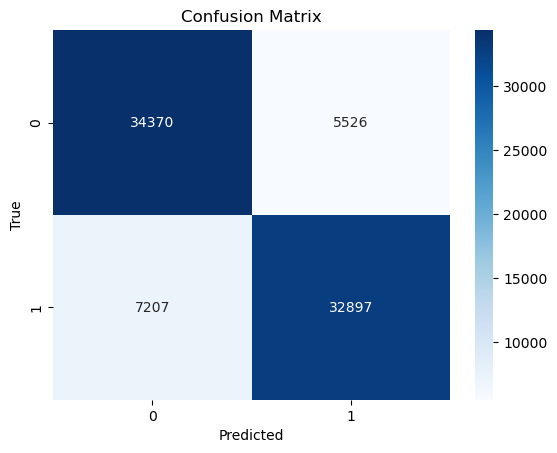

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_y_pred))
cmnb = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [26]:
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", accuracy_nb)
precision_nb = precision_score(y_test, nb_y_pred, average='weighted')   
print("Precision:", precision_nb)
recall_nb = recall_score(y_test, nb_y_pred, average='weighted')
print("Recall:", recall_nb)
f2_score_nb = fbeta_score(y_test, nb_y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score_nb)


Accuracy: 0.8408375
Precision: 0.8414578083766426
Recall: 0.8408375
F2 Score: 0.8407237644283192
